GOALS:

The goal of this project is to develop a linear regression model to predict house prices using the House Price Prediction Treated Dataset. We aim to analyze various features, such as the number of bedrooms, bathrooms, living area, and property conditions, to understand their impact on house prices. 

LOADING THE DATA

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [29]:
train_df = pd.read_csv('df_test_houseprice.csv')
test_df = pd.read_csv('df_train_houseprice.csv')

DATA INFORMATION

In [30]:
train_df.columns

Index(['date', 'price', 'bedrooms', 'grade', 'has_basement', 'living_in_m2',
       'renovated', 'nice_view', 'perfect_condition', 'real_bathrooms',
       'has_lavatory', 'single_floor', 'month', 'quartile_zone'],
      dtype='object')

In [31]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6948 entries, 0 to 6947
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               6948 non-null   object 
 1   price              6948 non-null   float64
 2   bedrooms           6948 non-null   int64  
 3   grade              6948 non-null   int64  
 4   has_basement       6948 non-null   bool   
 5   living_in_m2       6948 non-null   float64
 6   renovated          6948 non-null   bool   
 7   nice_view          6948 non-null   bool   
 8   perfect_condition  6948 non-null   bool   
 9   real_bathrooms     6948 non-null   int64  
 10  has_lavatory       6948 non-null   bool   
 11  single_floor       6948 non-null   bool   
 12  month              6948 non-null   int64  
 13  quartile_zone      6948 non-null   int64  
dtypes: bool(6), float64(2), int64(5), object(1)
memory usage: 475.1+ KB


In [32]:
train_df.isnull().sum()

date                 0
price                0
bedrooms             0
grade                0
has_basement         0
living_in_m2         0
renovated            0
nice_view            0
perfect_condition    0
real_bathrooms       0
has_lavatory         0
single_floor         0
month                0
quartile_zone        0
dtype: int64

In [33]:
print(train_df.describe())

              price     bedrooms        grade  living_in_m2  real_bathrooms  \
count  6.948000e+03  6948.000000  6948.000000   6948.000000     6948.000000   
mean   5.001805e+05     3.350461     7.580455    187.564084        1.723805   
std    2.464662e+05     0.886833     1.098832     76.220497        0.697007   
min    7.500000e+04     0.000000     3.000000     34.374110        0.000000   
25%    3.200000e+05     3.000000     7.000000    131.341616        1.000000   
50%    4.470000e+05     3.000000     7.000000    176.469248        2.000000   
75%    6.200000e+05     4.000000     8.000000    231.328470        2.000000   
max    1.485000e+06     7.000000    12.000000    661.469360        6.000000   

             month  quartile_zone  
count  6948.000000    6948.000000  
mean      6.527778       2.467473  
std       3.106609       1.087747  
min       1.000000       1.000000  
25%       4.000000       2.000000  
50%       6.000000       2.000000  
75%       9.000000       3.000000  


EXPLORATORY DATA ANALYSIS

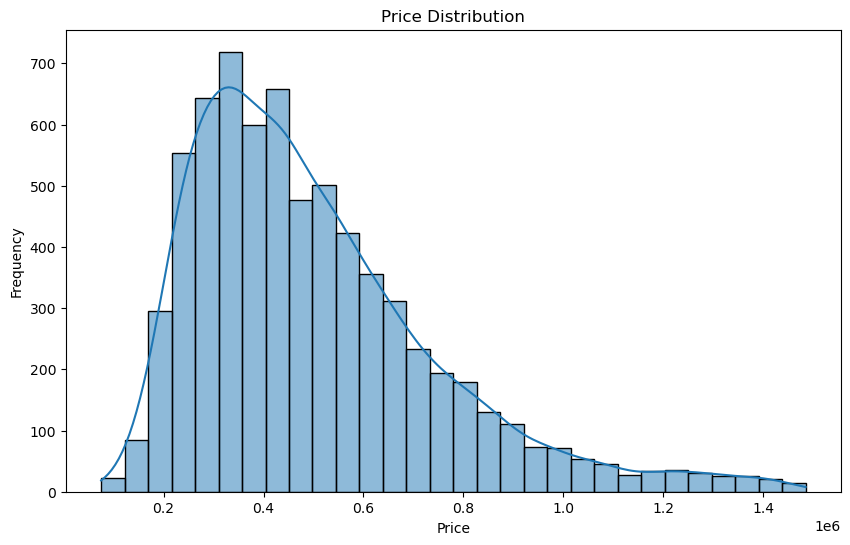

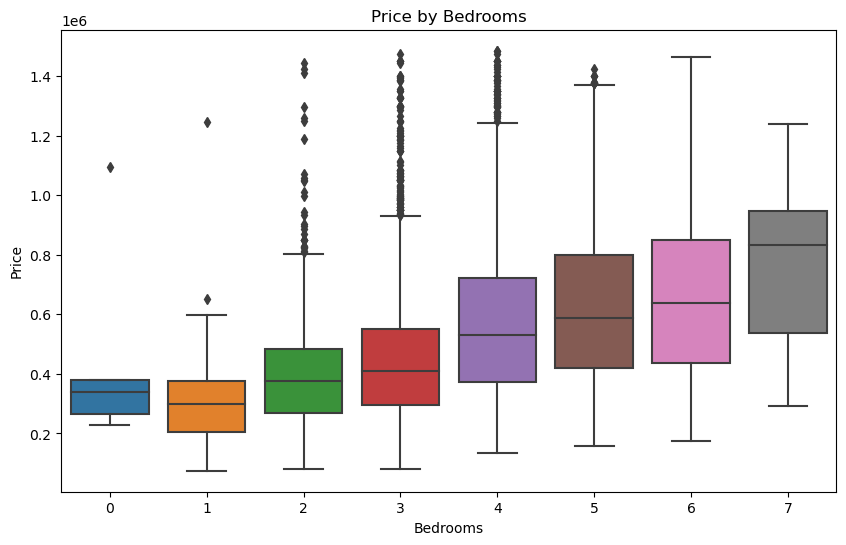

In [34]:
# Price distribution
plt.figure(figsize=(10,6))
sns.histplot(train_df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Relationship between number of bedrooms and price
plt.figure(figsize=(10,6))
sns.boxplot(x='bedrooms', y='price', data=train_df)
plt.title('Price by Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price')
plt.show()

In [35]:

train_df['date'] = pd.to_datetime(train_df['date'])  
train_df['year'] = train_df['date'].dt.year  
train_df['month'] = train_df['date'].dt.month  
train_df.drop('date', axis=1, inplace=True)


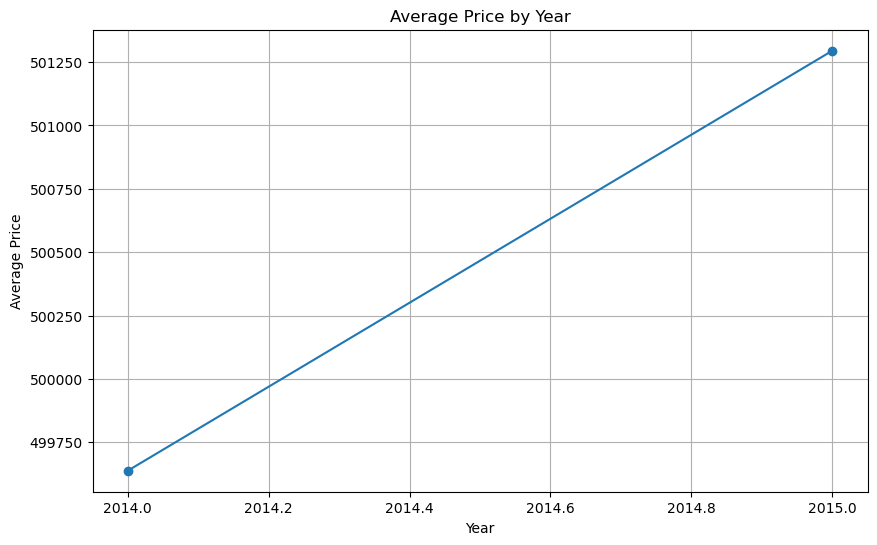

In [36]:
# Average price per year
plt.figure(figsize=(10,6))
train_df.groupby('year')['price'].mean().plot(kind='line', marker='o')
plt.title('Average Price by Year')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


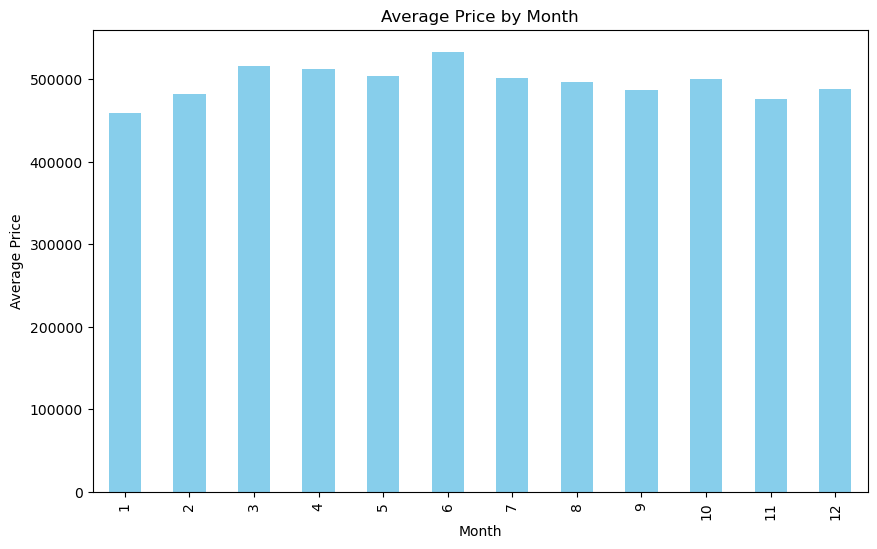

In [37]:
# Average price per month
plt.figure(figsize=(10,6))
train_df.groupby('month')['price'].mean().plot(kind='bar', color='skyblue')
plt.title('Average Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.show()


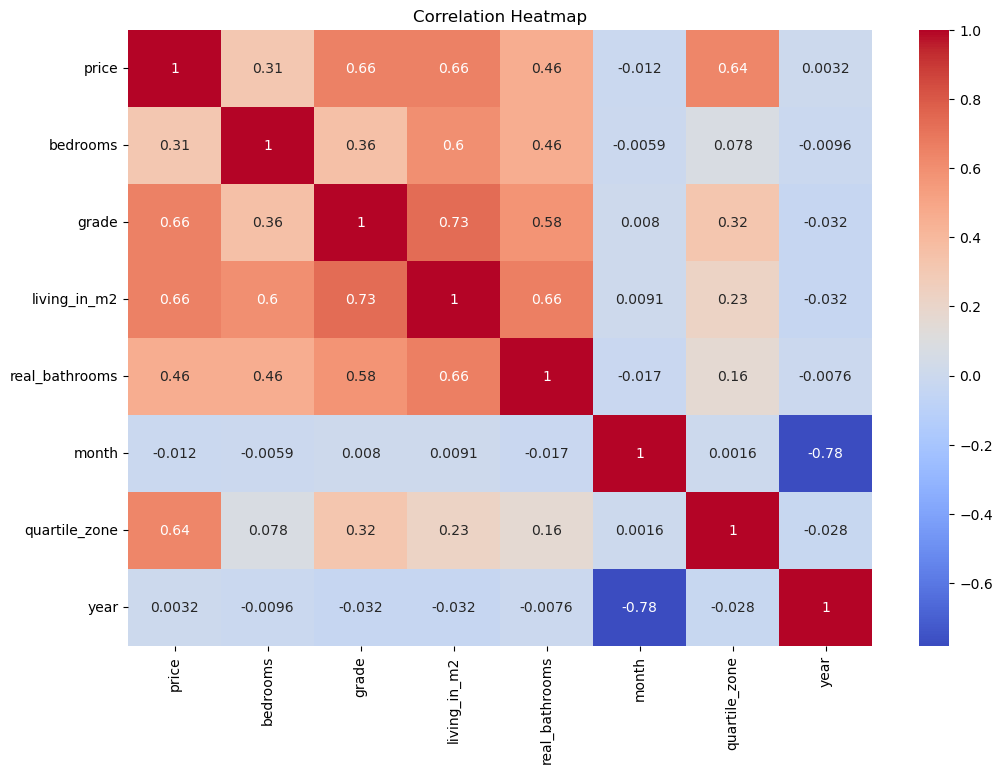

In [38]:
# Correlation heatmap
numeric_df = train_df.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [39]:
# One-hot encoding of categorical variables (flags and regions)
df = pd.get_dummies(train_df, columns=['nice_view', 'perfect_condition', 'has_basement', 'renovated', 
                                 'has_lavatory', 'single_floor', 'quartile_zone'], drop_first=True)

In [40]:
# Independent variables (X) and dependent variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Model
model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 14709728276.485584
R^2 Score: 0.7562991820557013


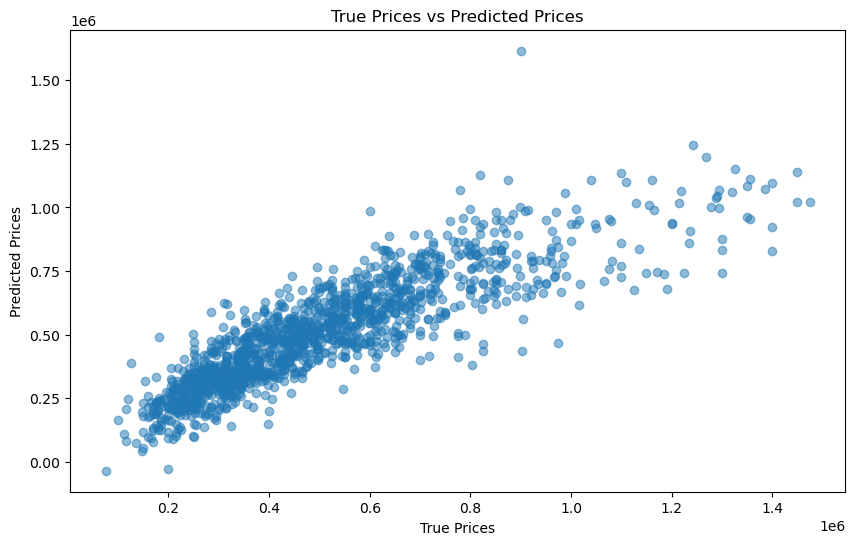

                          Coefficient
bedrooms                 -9243.853903
grade                    56402.536066
living_in_m2              1198.934005
real_bathrooms           -3594.698216
month                     1615.362260
year                     31501.905210
nice_view_True          134956.440376
perfect_condition_True   80446.467734
has_basement_True        23149.498564
renovated_True           79453.129197
has_lavatory_True       -33048.960461
single_floor_True       -13779.824909
quartile_zone_2         103824.186611
quartile_zone_3         214495.893090
quartile_zone_4         312374.790052


In [41]:
# Actual vs Estimated prices
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('True Prices vs Predicted Prices')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.show()

# See the model coefficients and the effects of the variables
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


CONCLUSION:
In conclusion, the implementation of the linear regression model demonstrated the relationships between the selected features and house prices. The model's performance was evaluated using metrics like Mean Squared Error (MSE) and R² score, providing insights into its predictive accuracy.